In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar100

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.utils import to_categorical 

In [2]:
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


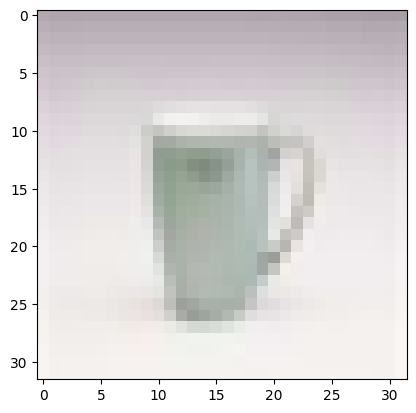

Hình này là: [28]


In [5]:
picture = train_images[7]
plt.imshow(picture, cmap = plt.cm.binary)
plt.show()
print("Hình này là:", train_labels[7])

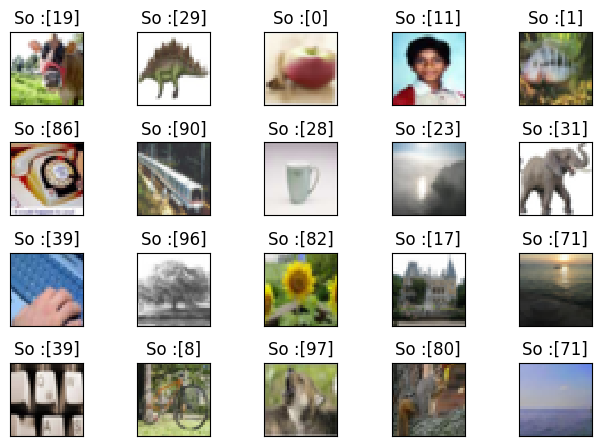

In [6]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])   

In [7]:
model = Sequential()

model.add(Dense(4096, activation= 'relu',input_shape= (32*32*3,) )) 
model.add(Dense(2048, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))

model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dense_2 (Dense)             (None, 100)               204900    
                                                                 
Total params: 21,182,564
Trainable params: 21,182,564
Non-trainable params: 0
_________________________________________________________________


In [8]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255
     
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100) 

In [9]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs=10, batch_size=1000)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/10
50/50 [==============================] - 136s 3s/step - loss: 5.7965 - accuracy: 0.0265
Epoch 2/10
50/50 [==============================] - 131s 3s/step - loss: 4.2168 - accuracy: 0.0537
Epoch 3/10
50/50 [==============================] - 125s 3s/step - loss: 4.0332 - accuracy: 0.0801
Epoch 4/10
50/50 [==============================] - 127s 3s/step - loss: 3.9187 - accuracy: 0.0985
Epoch 5/10
50/50 [==============================] - 124s 2s/step - loss: 3.8174 - accuracy: 0.1154
Epoch 6/10
50/50 [==============================] - 132s 3s/step - loss: 3.7347 - accuracy: 0.1293
Epoch 7/10
50/50 [==============================] - 129s 3s/step - loss: 3.6692 - accuracy: 0.1407
Epoch 8/10
50/50 [==============================] - 125s 2s/step - loss: 3.5753 - accuracy: 0.1571
Epoch 9/10
50/50 [==============================] - 128s 3s/step - loss: 3.5290 - accuracy: 0.1653
Epoch 10/10
313/313 [==============================] - 17s 52ms/step - loss: 3.5159 - accuracy: 0.1719
Accure

In [10]:
model.save('cifar100.h5')